# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df["normalized-losses"].replace("?", np.nan, inplace=True)
df["horsepower"].replace("?", np.nan, inplace=True)

df["normalized-losses"] = df["normalized-losses"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")

nlmean = df["normalized-losses"].mean() 
hpmean = df["horsepower"].mean()

df["normalized-losses"].fillna(nlmean, inplace=True)
df["horsepower"].fillna(hpmean, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


# Outliers

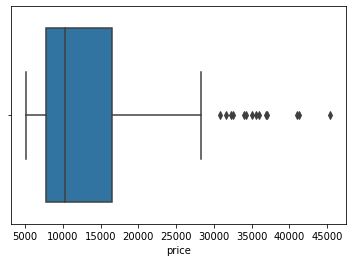

In [6]:
sns.boxplot(df['price'])

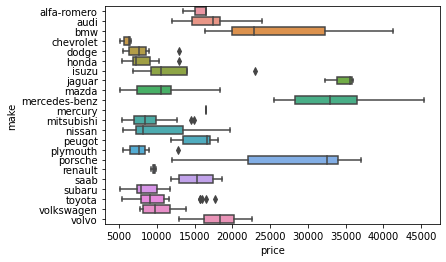

In [7]:
sns.boxplot(data=df, x='price', y='make')

In [8]:
df[(df['make']=='isuzu') & (df['price']>20000)]
df.drop(45, inplace=True)
df[(df['make']=='dodge') & (df['price']>11000)]
df.drop(29, inplace=True)
df[(df['make']=='honda') & (df['price']>12000)]
df.drop(41, inplace=True)
df[(df['make']=='mitsubishi') & (df['price']>12000)]
df.drop([82,83,84], inplace=True)
df[(df['make']=='plymouth') & (df['price']>11000)]
df.drop(124, inplace=True)
df[(df['make']=='toyota') & (df['price']>13000)]
df.drop([172,178,179,180,181], inplace=True)

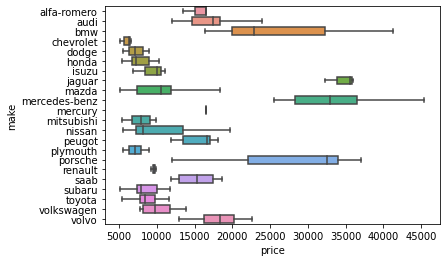

In [9]:
sns.boxplot(data=df, x='price', y='make')

# Encoding


In [10]:
df_num = df.select_dtypes(["int64", "float64"])
df_cat = df.select_dtypes(object)

In [11]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [14]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


# Skewness


In [15]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


symboling
0.2147470605758054


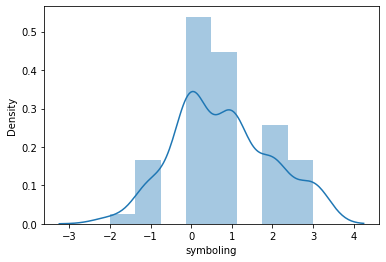

normalized-losses
0.846315331460635


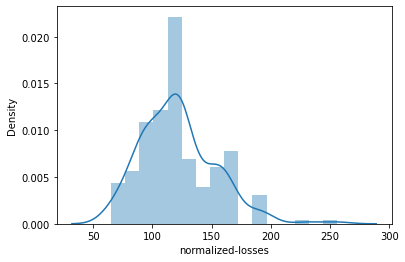

width
0.9147899492639983


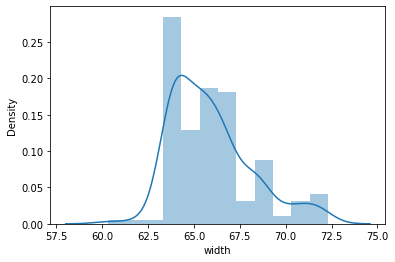

height
0.007986794777796822


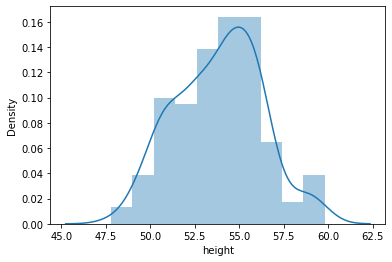

engine-size
2.0664919440355707


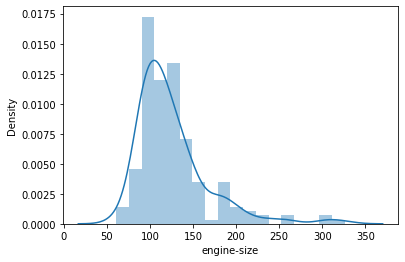

horsepower
1.576213559993105


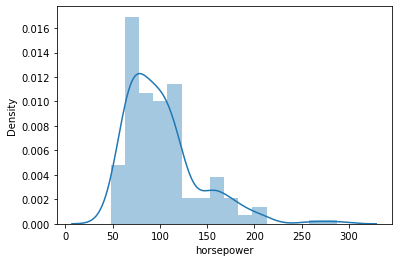

city-mpg
0.5925146641287237


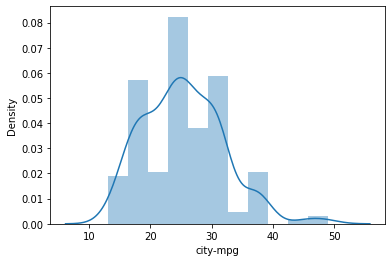

highway-mpg
0.4682909445793763


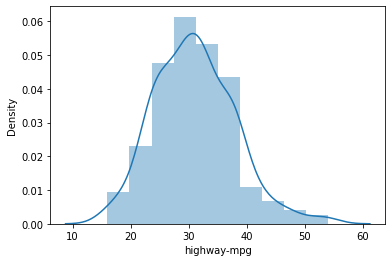

price
1.8111556001787903


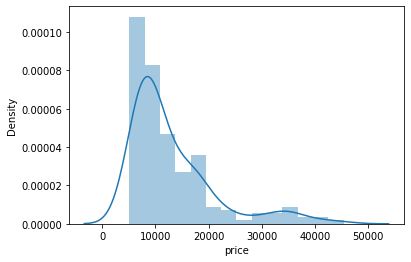

In [16]:
from scipy.stats import skew

for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

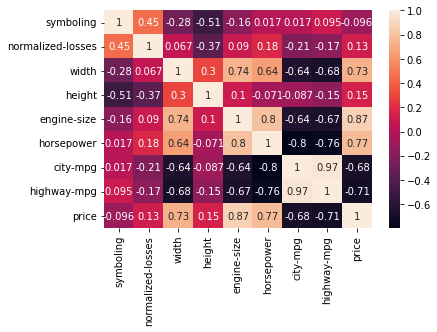

In [17]:
sns.heatmap(df_num.corr(), annot=True)

In [18]:
df_num['normalized-losses'] = np.sqrt(df_num['normalized-losses'])

In [19]:
skew(df_num['normalized-losses'])

0.4138774124738748

# concating the dataset

In [20]:
df = pd.concat([df_cat, df_num], axis=1)

In [21]:
df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,11.045361,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,12.806248,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,12.806248,66.4,54.3,136,115.0,18,22,17450


# Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

for col in df:
    sc =StandardScaler()
    df[col] = sc.fit_transform(df[[col]])


# Feature Engineering

In [23]:
df["Area"] = df["height"] * df["width"]
df.drop(["height", "width"], axis=1, inplace=True)

In [24]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
x

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.083051,0.107874,0.224311,-0.680796,-0.585808,0.050194
1,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.083051,0.107874,0.224311,-0.680796,-0.585808,0.422324
2,-1.930113,0.340010,-0.752016,1.229517,-0.125656,1.938242,0.187187,0.083051,0.631937,1.321612,-0.987075,-0.731505,0.422324
3,-1.771124,0.340010,0.427976,-0.568186,-0.125656,-0.078366,1.027350,1.346403,-0.392369,-0.005357,-0.221378,-0.148717,0.106540
4,-1.771124,0.340010,0.427976,-2.365889,-0.125656,-0.078366,1.027350,1.346403,0.250800,0.326386,-1.140215,-1.314294,0.539969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.848608,0.369905,0.300867,-0.374517,-0.440111,0.465048
201,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.848608,0.369905,1.474724,-0.987075,-0.877202,0.737489
202,1.408661,0.340010,0.427976,1.229517,-0.125656,1.938242,-1.493140,-0.848608,1.132180,0.811240,-1.140215,-1.168596,1.039652
203,1.408661,-2.941088,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.848608,0.465190,0.096718,0.084901,-0.585808,1.161631


In [26]:
y

0      1.693561
1      1.693561
2      0.105507
3      0.026694
4      0.043925
         ...   
200    0.937146
201    0.906010
202    0.937146
203    0.937146
204    0.937146
Name: Area, Length: 193, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

LinearRegression()

In [29]:
train = linreg.score(xtrain, ytrain)
test = linreg.score(xtest, ytest)
print(f"Traning Result -: {train}")
print(f"Test Result -: {test}")

Traning Result -: 0.37085270618775945
Test Result -: 0.005504591665618674


In [30]:
#low training error -: low bias
#high test error -: high variance
#overfitting

In [31]:
from sklearn.linear_model import Ridge, Lasso

In [32]:
#Lasso
l1 = Lasso(alpha=10)
l1.fit(xtrain, ytrain)

Lasso(alpha=10)

In [33]:
train = l1.score(xtrain, ytrain)
test = l1.score(xtest, ytest)
print(f"Traning Result -: {train}")
print(f"Test Result -: {test}")

Traning Result -: 0.0
Test Result -: -0.007662080696297258


# Hyperparameter tuning

In [34]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -> {l2.score(xtest, ytest)}")

0 -> 0.005504591665616676
1 -> 0.04830702620008187
2 -> 0.076026358947342
3 -> 0.09622620680785376
4 -> 0.11170561665971102
5 -> 0.12386622077778331
6 -> 0.13354869649614565
7 -> 0.14131450159943626
8 -> 0.14756402528363965
9 -> 0.1525950163121721
10 -> 0.15663527001807365
11 -> 0.15986265125096655
12 -> 0.16241819746743258
13 -> 0.1644151175623978
14 -> 0.16594519742951808
15 -> 0.16708348536444018
16 -> 0.16789179282982458
17 -> 0.16842135508771472
18 -> 0.16871488193836082
19 -> 0.16880815722795317
20 -> 0.16873129921936825
21 -> 0.16850976266048523
22 -> 0.16816514185080955
23 -> 0.1677158188484268
24 -> 0.16717749009134752
25 -> 0.16656359679259714
26 -> 0.16588567862578762
27 -> 0.16515366585331148
28 -> 0.16437612175426852
29 -> 0.16356044469806663
30 -> 0.16271303727943798
31 -> 0.16183944843535636
32 -> 0.16094449329772542
33 -> 0.1600323546194251
34 -> 0.1591066688872429
35 -> 0.1581705996597138
36 -> 0.15722690020803243
37 -> 0.156277967168855
38 -> 0.1553258866197602
39 -> 

In [35]:
l2 = Ridge(alpha=10)
l2.fit(xtrain, ytrain)

Ridge(alpha=10)

In [36]:
from sklearn.metrics import r2_score
ypred = l2.predict(xtest)
print(f"Accuracy -: {r2_score(ytest, ypred)}")

train = l2.score(xtrain, ytrain)
test = l2.score(xtest, ytest)
print(f"Traning Result -: {train}")
print(f"Test Result -: {test}")

Accuracy -: 0.15663527001807365
Traning Result -: 0.3363264307341184
Test Result -: 0.15663527001807365


In [37]:
for i in range(151, 251):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain, ytrain)
    print(f"{i} -> {l1.score(xtest, ytest)}")

151 -> -0.007662080696297258
152 -> -0.007662080696297258
153 -> -0.007662080696297258
154 -> -0.007662080696297258
155 -> -0.007662080696297258
156 -> -0.007662080696297258
157 -> -0.007662080696297258
158 -> -0.007662080696297258
159 -> -0.007662080696297258
160 -> -0.007662080696297258
161 -> -0.007662080696297258
162 -> -0.007662080696297258
163 -> -0.007662080696297258
164 -> -0.007662080696297258
165 -> -0.007662080696297258
166 -> -0.007662080696297258
167 -> -0.007662080696297258
168 -> -0.007662080696297258
169 -> -0.007662080696297258
170 -> -0.007662080696297258
171 -> -0.007662080696297258
172 -> -0.007662080696297258
173 -> -0.007662080696297258
174 -> -0.007662080696297258
175 -> -0.007662080696297258
176 -> -0.007662080696297258
177 -> -0.007662080696297258
178 -> -0.007662080696297258
179 -> -0.007662080696297258
180 -> -0.007662080696297258
181 -> -0.007662080696297258
182 -> -0.007662080696297258
183 -> -0.007662080696297258
184 -> -0.007662080696297258
185 -> -0.0076

In [38]:
l1 = Lasso(alpha=210)
l1.fit(xtrain, ytrain)

Lasso(alpha=210)

In [39]:
ypred = l1.predict(xtest)
print(f"Accuracy -: {r2_score(ytest, ypred)}")

train = l1.score(xtrain, ytrain)
test = l1.score(xtest, ytest)
print(f"Traning Result -: {train}")
print(f"Test Result -: {test}")

Accuracy -: -0.007662080696297258
Traning Result -: 0.0
Test Result -: -0.007662080696297258


# Cross Validation

In [40]:
from sklearn.model_selection import KFold

In [41]:
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [42]:
print("{} {:^61} {}".format("Iteration", "Training Set Observation", "Testing Set Observations"))

for iteration, data in enumerate(kf, start=1):
    print("{:^9} {} {:^25}".format(iteration, data[0], str(data[1])))

Iteration                   Training Set Observation                    Testing Set Observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cvs = cross_val_score(l1, x, y, cv=4)

In [45]:
cvs

array([-0.0025303 , -0.03227789, -0.00089469, -0.08871551])

In [46]:
cvs.mean()

-0.031104597720078175

In [47]:
3/5

0.6